****Le problème du voyageur de commerce par la méthode de l'algorithme génétique****

Distance initiale : 4241.429705317402 km
Distance finale (optimisée): 2628.889196078901 km


En faisant l'hypothèse que nous nous déplacions en ligne droite entre les villes, le circuit optimal est: 

Caen
Rouen
Amiens
Lille
Paris
Dijon
Lyon
Marseille
Toulouse
Bordeaux
Nantes
Brest
Rennes
Caen


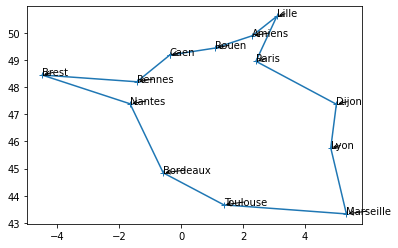

In [1]:
from random import *
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import *


print("****Le problème du voyageur de commerce par la méthode de l'algorithme génétique****\n")
class Ville:
    def __init__(self, lon, lat, nom):
        self.lon = lon
        self.lat = lat
        self.nom = nom
   

    def distance(self, ville):
        distancex = (ville.lon-self.lon)*40000*math.cos((self.lat+ville.lat)*math.pi/360)/360
        distancey = (self.lat-ville.lat)*40000/360
        distanceX=int(distancex)
        distanceY=int(distancey)
        distance = math.sqrt( (distanceX*distanceX) + (distanceY*distanceY) )
        return distance

    
class GestionnaireCircuit:
    villesDestinations = []
   
    def ajouterVille(self, ville):
        self.villesDestinations.append(ville)
   
    def getVille(self, index):
        return self.villesDestinations[index]
   
    def nombreVilles(self):
        return len(self.villesDestinations)

class Circuit:
    def __init__(self, gestionnaireCircuit, circuit=None):
        self.gestionnaireCircuit = gestionnaireCircuit
        self.circuit = []
        self.fitness = 0.0
        self.distance = 0
        if circuit is not None:
            self.circuit = circuit
        else:
            for i in range(0, self.gestionnaireCircuit.nombreVilles()):
                self.circuit.append(None)

    def __len__(self):
        return len(self.circuit)
   
    def __getitem__(self, index):
        return self.circuit[index]

    def __setitem__(self, key, value):
        self.circuit[key] = value

    def genererIndividu(self):
        for indiceVille in range(0, self.gestionnaireCircuit.nombreVilles()):
            self.setVille(indiceVille, self.gestionnaireCircuit.getVille(indiceVille))
        random.shuffle(self.circuit)

    def getVille(self, circuitPosition):
        return self.circuit[circuitPosition]

    def setVille(self, circuitPosition, ville):
        self.circuit[circuitPosition] = ville
        self.fitness = 0.0
        self.distance = 0

    def getFitness(self):
        if self.fitness == 0:
            self.fitness = 1/float(self.getDistance())
        return self.fitness

    def getDistance(self):
        if self.distance == 0:
            circuitDistance = 0
            for indiceVille in range(0, self.tailleCircuit()):
                villeOrigine = self.getVille(indiceVille)
                villeArrivee = None
                if indiceVille+1 < self.tailleCircuit():
                    villeArrivee = self.getVille(indiceVille+1)
                else:
                    villeArrivee = self.getVille(0)
                circuitDistance += villeOrigine.distance(villeArrivee)
            self.distance = circuitDistance
        return self.distance

    def tailleCircuit(self):
        return len(self.circuit)

    def contientVille(self, ville):
        return ville in self.circuit
    
class Population:
    def __init__(self, gestionnaireCircuit, taillePopulation, init):
        self.circuits = []
        for i in range(0, taillePopulation):
            self.circuits.append(None)
      
        if init:
            for i in range(0, taillePopulation):
                nouveauCircuit = Circuit(gestionnaireCircuit)
                nouveauCircuit.genererIndividu()
                self.sauvegarderCircuit(i, nouveauCircuit)
      
    def __setitem__(self, key, value):
        self.circuits[key] = value
   
    def __getitem__(self, index):
        return self.circuits[index]
   
    def sauvegarderCircuit(self, index, circuit):
        self.circuits[index] = circuit
   
    def getCircuit(self, index):
        return self.circuits[index]
   
    def getFittest(self):
        fittest = self.circuits[0]
        for i in range(0, self.taillePopulation()):
            if fittest.getFitness() <= self.getCircuit(i).getFitness():
                fittest = self.getCircuit(i)
        return fittest
   
    def taillePopulation(self):
        return len(self.circuits)


    
class GA:
    def __init__(self, gestionnaireCircuit):
        
        self.gestionnaireCircuit = gestionnaireCircuit
        self.tauxMutation = 0.015
        self.tailleTournoi = 5
        self.elitisme = True
    def evoluerPopulation(self, pop):
        nouvellePopulation = Population(self.gestionnaireCircuit, pop.taillePopulation(), False)
        elitismeOffset = 0
        if self.elitisme:
            nouvellePopulation.sauvegarderCircuit(0, pop.getFittest())
            elitismeOffset = 1
      
        for i in range(elitismeOffset, nouvellePopulation.taillePopulation()):
            parent1 = self.selectionTournoi(pop)
            parent2 = self.selectionTournoi(pop)
            enfant = self.crossover(parent1, parent2)
            nouvellePopulation.sauvegarderCircuit(i, enfant)
      
        for i in range(elitismeOffset, nouvellePopulation.taillePopulation()):
            self.muter(nouvellePopulation.getCircuit(i))
      
        return nouvellePopulation
    
    def crossover(self, parent1, parent2):
        enfant = Circuit(self.gestionnaireCircuit)
      
        startPos = int(random.random() * parent1.tailleCircuit())
        endPos = int(random.random() * parent1.tailleCircuit())
      
        for i in range(0, enfant.tailleCircuit()):
            if startPos < endPos and i > startPos and i < endPos:
                enfant.setVille(i, parent1.getVille(i))
            elif startPos > endPos:
                if not (i < startPos and i > endPos):
                    enfant.setVille(i, parent1.getVille(i))
      
        for i in range(0, parent2.tailleCircuit()):
            if not enfant.contientVille(parent2.getVille(i)):
                for ii in range(0, enfant.tailleCircuit()):
                    if enfant.getVille(ii) == None:
                        enfant.setVille(ii, parent2.getVille(i))
                        break
      
        return enfant
    def muter(self, circuit):
        for circuitPos1 in range(0, circuit.tailleCircuit()):
            if random.random() < self.tauxMutation:
                circuitPos2 = int(circuit.tailleCircuit() * random.random())

                ville1 = circuit.getVille(circuitPos1)
                ville2 = circuit.getVille(circuitPos2)

                circuit.setVille(circuitPos2, ville1)
                circuit.setVille(circuitPos1, ville2)

    def selectionTournoi(self, pop):
        tournoi = Population(self.gestionnaireCircuit, self.tailleTournoi, False)
        for i in range(0, self.tailleTournoi):
            randomId = int(random.random() * pop.taillePopulation())
            tournoi.sauvegarderCircuit(i, pop.getCircuit(randomId))
        fittest = tournoi.getFittest()
        return fittest

    
    
    
    
if __name__ == '__main__':
    
   
    gc = GestionnaireCircuit()   

    #on cree nos villes
    ville1 = Ville(2.295695, 49.894171, 'Amiens')
    gc.ajouterVille(ville1)
    ville2 = Ville(-0.580036, 44.841225, 'Bordeaux')
    gc.ajouterVille(ville2)
    ville3 = Ville(1.376579, 43.662010, 'Toulouse')
    gc.ajouterVille(ville3)
    ville4 = Ville(5.337151, 43.327276, 'Marseille')
    gc.ajouterVille(ville4)
    ville5 = Ville(-0.369891, 49.181003, 'Caen')
    gc.ajouterVille(ville5)
    ville6 = Ville(-1.650154, 47.385427, 'Nantes')
    gc.ajouterVille(ville6)
    ville7 = Ville(-1.430427, 48.197310, 'Rennes')
    gc.ajouterVille(ville7)
    ville8 = Ville(2.414787, 48.953260, 'Paris')
    gc.ajouterVille(ville8)
    ville9 = Ville(3.090447, 50.612962, 'Lille')
    gc.ajouterVille(ville9)
    ville10 = Ville(5.013054, 47.370547, 'Dijon')
    gc.ajouterVille(ville10)
    ville11 = Ville(4.832011, 45.757813, 'Lyon')
    gc.ajouterVille(ville11)
    ville12 = Ville(1.093965, 49.440459, 'Rouen')
    gc.ajouterVille(ville12)
    ville13 = Ville(-4.494615, 48.447500, 'Brest')
    gc.ajouterVille(ville13)
 


    #on initialise la population avec 100 circuits
    pop = Population(gc, 100, True)

    print ("Distance initiale : " + str(pop.getFittest().getDistance())+' km')
   
    # On fait evoluer notre population sur 100 generations
    ga = GA(gc)
    pop = ga.evoluerPopulation(pop)
    for i in range(0, 100):
        pop = ga.evoluerPopulation(pop)
   
    print ("Distance finale (optimisée): " + str(pop.getFittest().getDistance())+' km')
    meilleurePopulation = pop.getFittest()

    #on place les villes sur le repère
    lons = []
    lats = []
    noms = []
    distance=[]
    for ville in meilleurePopulation.circuit:
        lons.append(ville.lon)
        lats.append(ville.lat)
        noms.append(ville.nom)
        distance.append(ville.distance)
        
        plt.annotate(ville.nom, xy=(ville.lon, ville.lat),arrowprops=dict(arrowstyle='->'))

    lons.append(lons[0])
    lats.append(lats[0])
    noms.append(noms[0])
    #noms[0]='Lille' #par hypothèse, on commence par la ville de 'Lille'
    distance.append(distance[0])
    plt.plot(lons,lats,'+-')
print('\n')
print('En faisant l\'hypothèse que nous nous déplacions en ligne droite entre les villes, le circuit optimal est: \n')
for i in range(0, len(distance)):
    print(f'{noms[i]}')
plt.show()
    
    
